# Extraction

In [5]:
import zipfile
import os

def extract_zip(zip_path, extract_to):
    # Ensure the extraction directory exists
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)

    # Open the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all the contents of the zip file to the specified directory
        zip_ref.extractall(extract_to)

    print(f"Extracted contents to: {extract_to}")

# Example usage
zip_path = "archive.zip"
extract_to = 'data'
extract_zip(zip_path, extract_to)


Extracted contents to: data


# EDA

#### Load and preprocess the data

In [6]:
import pandas as pd
import numpy as np
# Load the data
file_path = r'data\DailyDelhiClimateTrain.csv'
train_data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
train_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
print(train_data.columns)

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


##### Check null values

In [8]:
print(train_data.isna().sum())

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [9]:
train_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


# Visualize the time series data

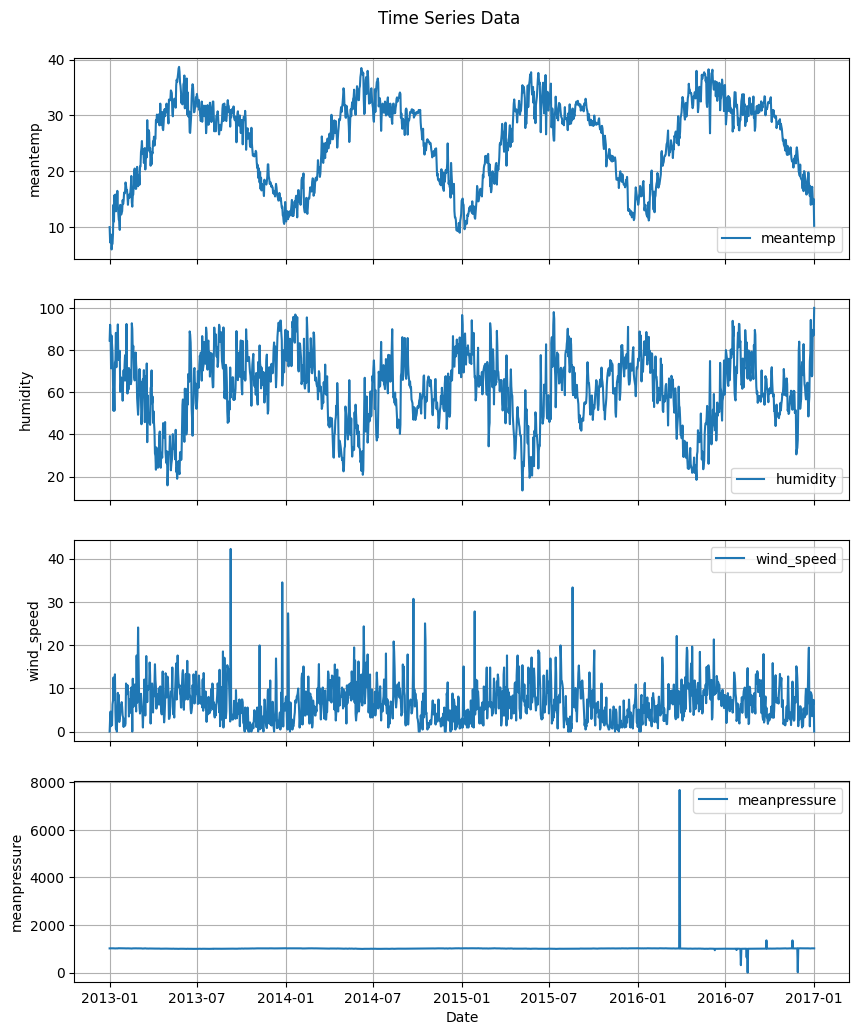

In [10]:
import matplotlib.pyplot as plt
# List of columns to plot
columns_to_plot = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Create subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 12), sharex=True)

# Loop through each column and create a subplot
for i, col in enumerate(columns_to_plot):
    axs[i].plot(train_data.index, train_data[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()
    axs[i].grid(True)

# Set the xlabel and title for the entire figure
axs[-1].set_xlabel('Date')
fig.suptitle('Time Series Data', y=0.92)

plt.show()

#### Load and preprocess the data

In [22]:
# Load the data
file_path = r'data\DailyDelhiClimateTest.csv'
test_data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
test_data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


# Visualize the time series data

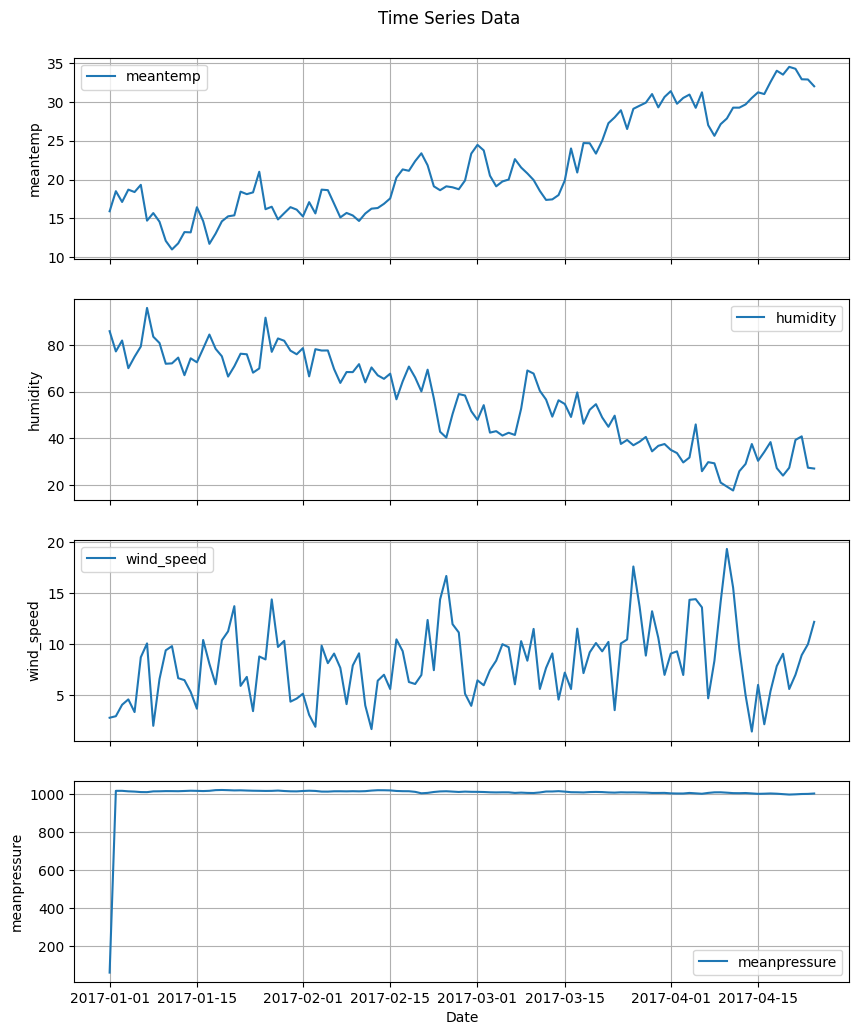

In [27]:
import matplotlib.pyplot as plt
# List of columns to plot
columns_to_plot = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Create subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 12), sharex=True)

# Loop through each column and create a subplot
for i, col in enumerate(columns_to_plot):
    axs[i].plot(test_data.index, test_data[col], label=col)
    axs[i].set_ylabel(col)
    axs[i].legend()
    axs[i].grid(True)

# Set the xlabel and title for the entire figure
axs[-1].set_xlabel('Date')
fig.suptitle('Time Series Data', y=0.92)

plt.show()

# ARIMA and SARIMAX implementation

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


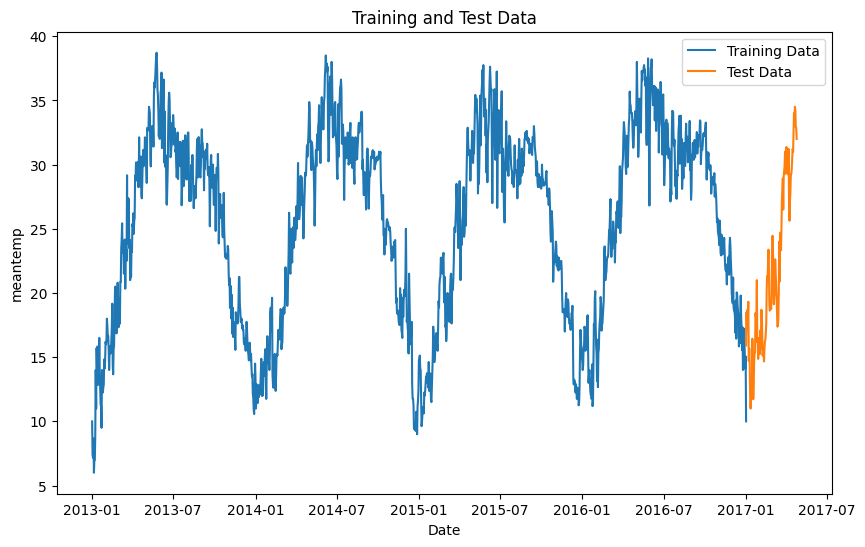

ARIMA MAE: 8.763999283348998, ARIMA RMSE: 10.72029366082387
SARIMAX MAE: 9.401257437510768, SARIMAX RMSE: 11.447561092635958


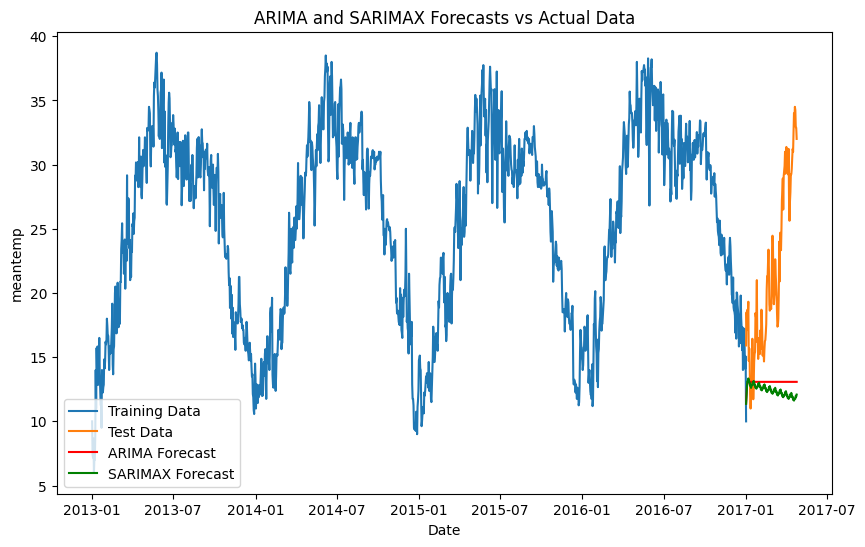

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Display the first few rows of the train and test data
print(train_data.head())
print(test_data.head())

# List of columns to analyze (assuming 'meantemp' is one of them)
column_to_analyze = 'meantemp'

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')
plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('Training and Test Data')
plt.legend()
plt.show()

# ARIMA Model
# Define the order (p, d, q)
arima_order = (1, 1, 1)  # Example order, adjust as needed

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_data[column_to_analyze], order=arima_order)
arima_fit = arima_model.fit()

# Forecast the values for the test period using ARIMA
arima_forecast = arima_fit.forecast(steps=len(test_data))

# SARIMAX Model
# Define the seasonal order (P, D, Q, s)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(train_data[column_to_analyze], order=arima_order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit()

# Forecast the values for the test period using SARIMAX
sarimax_forecast = sarimax_fit.get_forecast(steps=len(test_data)).predicted_mean

# Calculate evaluation metrics
arima_mae = mean_absolute_error(test_data[column_to_analyze], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], arima_forecast))

sarimax_mae = mean_absolute_error(test_data[column_to_analyze], sarimax_forecast)
sarimax_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], sarimax_forecast))

print(f'ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}')
print(f'SARIMAX MAE: {sarimax_mae}, SARIMAX RMSE: {sarimax_rmse}')

# Plot the original data and both forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')

# ARIMA Forecast
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')

# SARIMAX Forecast
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Forecast', color='green')

plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('ARIMA and SARIMAX Forecasts vs Actual Data')
plt.legend()
plt.show()


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


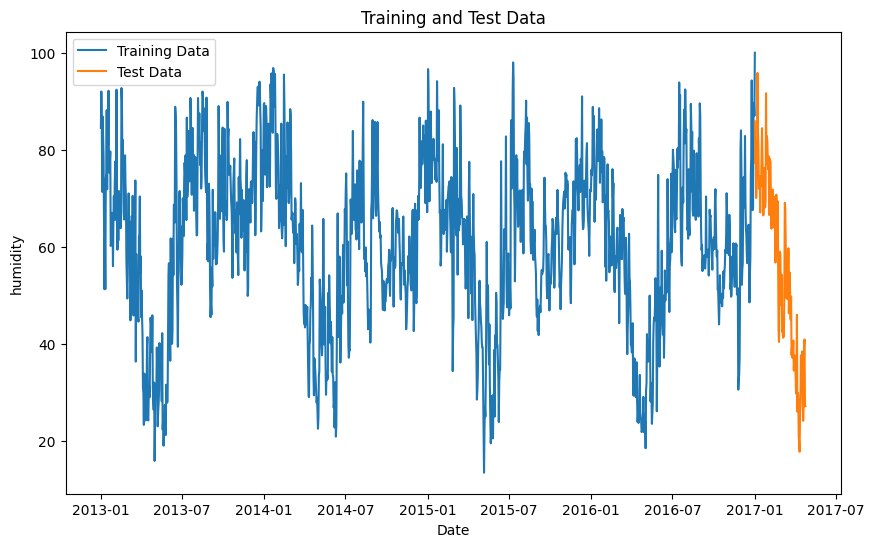

ARIMA MAE: 26.24577805318637, ARIMA RMSE: 31.804088835374944
SARIMAX MAE: 26.898858494909902, SARIMAX RMSE: 32.46729698157569


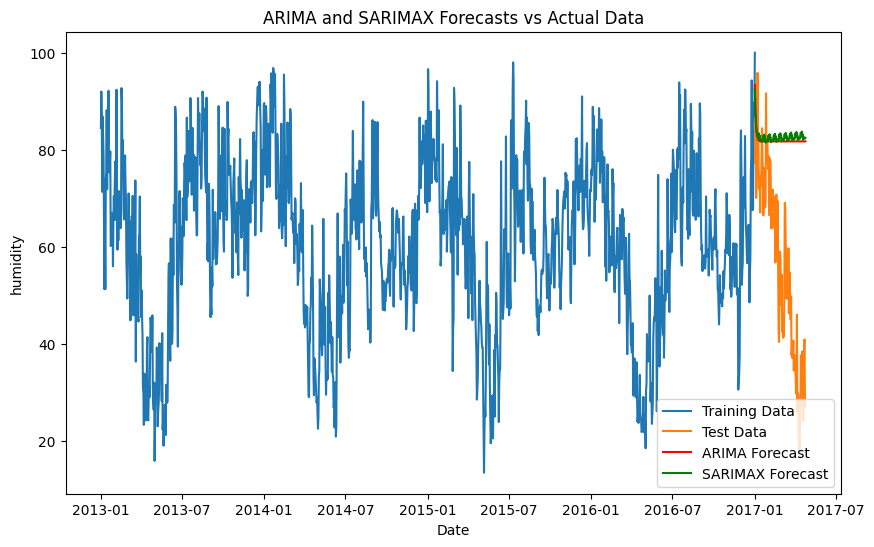

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Display the first few rows of the train and test data
print(train_data.head())
print(test_data.head())

# List of columns to analyze (assuming 'meantemp' is one of them)
column_to_analyze = 'humidity'

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')
plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('Training and Test Data')
plt.legend()
plt.show()

# ARIMA Model
# Define the order (p, d, q)
arima_order = (1, 1, 1)  # Example order, adjust as needed

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_data[column_to_analyze], order=arima_order)
arima_fit = arima_model.fit()

# Forecast the values for the test period using ARIMA
arima_forecast = arima_fit.forecast(steps=len(test_data))

# SARIMAX Model
# Define the seasonal order (P, D, Q, s)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(train_data[column_to_analyze], order=arima_order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit()

# Forecast the values for the test period using SARIMAX
sarimax_forecast = sarimax_fit.get_forecast(steps=len(test_data)).predicted_mean

# Calculate evaluation metrics
arima_mae = mean_absolute_error(test_data[column_to_analyze], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], arima_forecast))

sarimax_mae = mean_absolute_error(test_data[column_to_analyze], sarimax_forecast)
sarimax_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], sarimax_forecast))

print(f'ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}')
print(f'SARIMAX MAE: {sarimax_mae}, SARIMAX RMSE: {sarimax_rmse}')

# Plot the original data and both forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')

# ARIMA Forecast
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')

# SARIMAX Forecast
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Forecast', color='green')

plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('ARIMA and SARIMAX Forecasts vs Actual Data')
plt.legend()
plt.show()


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


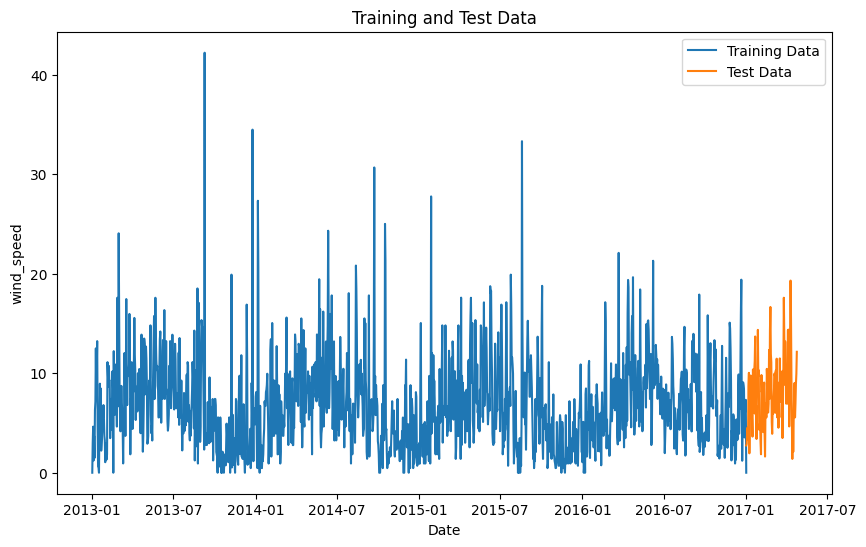

ARIMA MAE: 3.125307681126083, ARIMA RMSE: 4.041180388170825
SARIMAX MAE: 3.135545807353012, SARIMAX RMSE: 4.046717014043513


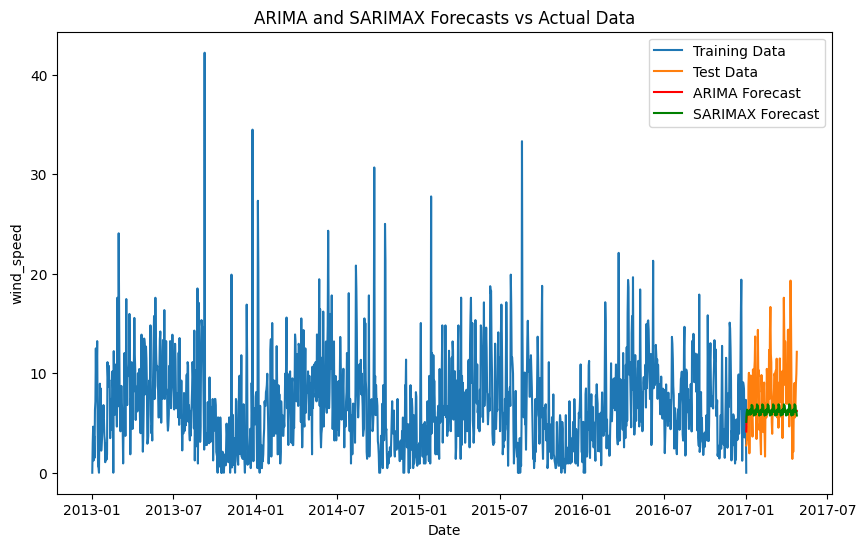

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Display the first few rows of the train and test data
print(train_data.head())
print(test_data.head())

# List of columns to analyze (assuming 'meantemp' is one of them)
column_to_analyze = 'wind_speed'

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')
plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('Training and Test Data')
plt.legend()
plt.show()

# ARIMA Model
# Define the order (p, d, q)
arima_order = (1, 1, 1)  # Example order, adjust as needed

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_data[column_to_analyze], order=arima_order)
arima_fit = arima_model.fit()

# Forecast the values for the test period using ARIMA
arima_forecast = arima_fit.forecast(steps=len(test_data))

# SARIMAX Model
# Define the seasonal order (P, D, Q, s)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(train_data[column_to_analyze], order=arima_order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit()

# Forecast the values for the test period using SARIMAX
sarimax_forecast = sarimax_fit.get_forecast(steps=len(test_data)).predicted_mean

# Calculate evaluation metrics
arima_mae = mean_absolute_error(test_data[column_to_analyze], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], arima_forecast))

sarimax_mae = mean_absolute_error(test_data[column_to_analyze], sarimax_forecast)
sarimax_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], sarimax_forecast))

print(f'ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}')
print(f'SARIMAX MAE: {sarimax_mae}, SARIMAX RMSE: {sarimax_rmse}')

# Plot the original data and both forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')

# ARIMA Forecast
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')

# SARIMAX Forecast
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Forecast', color='green')

plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('ARIMA and SARIMAX Forecasts vs Actual Data')
plt.legend()
plt.show()


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


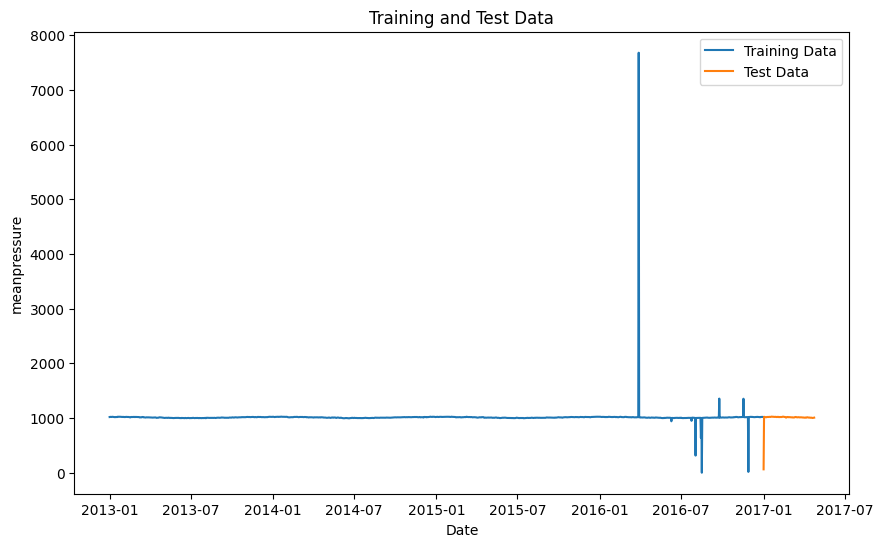

ARIMA MAE: 13.209608573815775, ARIMA RMSE: 89.40553451308193
SARIMAX MAE: 18.354839523251005, SARIMAX RMSE: 91.06685538511847


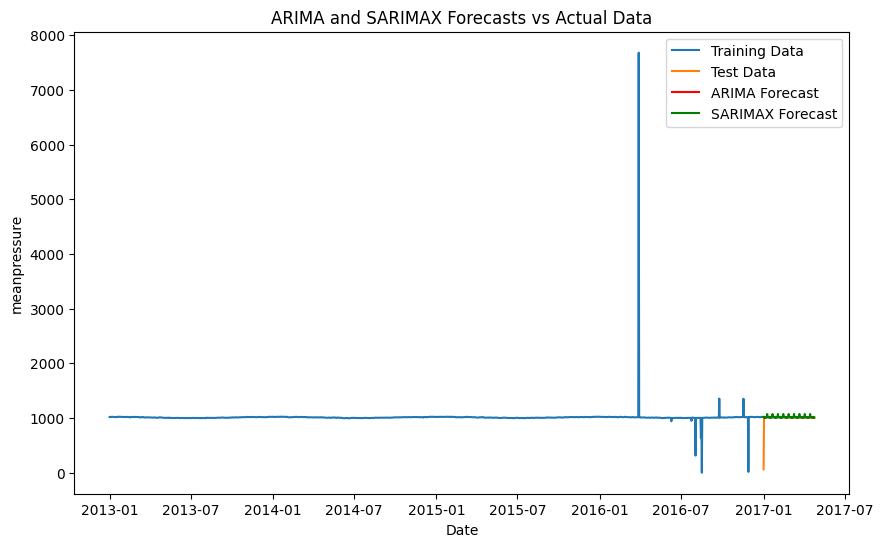

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Display the first few rows of the train and test data
print(train_data.head())
print(test_data.head())

# List of columns to analyze (assuming 'meantemp' is one of them)
column_to_analyze = 'meanpressure'

# Plot the training and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')
plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('Training and Test Data')
plt.legend()
plt.show()

# ARIMA Model
# Define the order (p, d, q)
arima_order = (1, 1, 1)  # Example order, adjust as needed

# Fit the ARIMA model on the training data
arima_model = ARIMA(train_data[column_to_analyze], order=arima_order)
arima_fit = arima_model.fit()

# Forecast the values for the test period using ARIMA
arima_forecast = arima_fit.forecast(steps=len(test_data))

# SARIMAX Model
# Define the seasonal order (P, D, Q, s)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(train_data[column_to_analyze], order=arima_order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit()

# Forecast the values for the test period using SARIMAX
sarimax_forecast = sarimax_fit.get_forecast(steps=len(test_data)).predicted_mean

# Calculate evaluation metrics
arima_mae = mean_absolute_error(test_data[column_to_analyze], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], arima_forecast))

sarimax_mae = mean_absolute_error(test_data[column_to_analyze], sarimax_forecast)
sarimax_rmse = np.sqrt(mean_squared_error(test_data[column_to_analyze], sarimax_forecast))

print(f'ARIMA MAE: {arima_mae}, ARIMA RMSE: {arima_rmse}')
print(f'SARIMAX MAE: {sarimax_mae}, SARIMAX RMSE: {sarimax_rmse}')

# Plot the original data and both forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data[column_to_analyze], label='Training Data')
plt.plot(test_data.index, test_data[column_to_analyze], label='Test Data')

# ARIMA Forecast
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')

# SARIMAX Forecast
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Forecast', color='green')

plt.xlabel('Date')
plt.ylabel(column_to_analyze)
plt.title('ARIMA and SARIMAX Forecasts vs Actual Data')
plt.legend()
plt.show()
